# Identificar fronteras no lineales

In [1]:
from sklearn.datasets.samples_generator import make_circles

In [2]:
X, Y = make_circles(100, factor = .1, noise = .1) 

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

/Users/JuanGabriel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [14]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

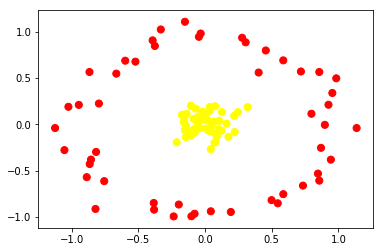

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

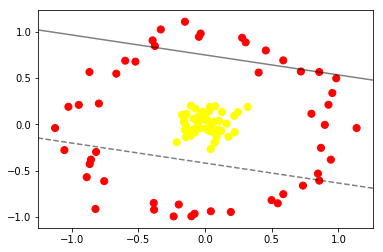

In [15]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [16]:
r = np.exp(-(X**2).sum(1))

In [17]:
r

array([0.36818596, 0.99683274, 0.98004106, 0.96359441, 0.45527788,
       0.3319918 , 0.40182683, 0.97431764, 0.99588324, 0.96024516,
       0.99652482, 0.95688224, 0.95229884, 0.99459105, 0.34325532,
       0.99750123, 0.99690068, 0.98038774, 0.92990067, 0.99778036,
       0.39502319, 0.48150218, 0.35830228, 0.38120558, 0.41764426,
       0.96665473, 0.39219701, 0.52198638, 0.99134565, 0.92408127,
       0.98918207, 0.94499936, 0.34842023, 0.97751382, 0.98308532,
       0.99750055, 0.96594058, 0.3706404 , 0.98458359, 0.97418051,
       0.28276771, 0.22185955, 0.47046283, 0.352884  , 0.33848479,
       0.38546437, 0.94911696, 0.99311764, 0.96859857, 0.9947006 ,
       0.98696264, 0.97436558, 0.62154576, 0.35523754, 0.9747215 ,
       0.3767697 , 0.28617381, 0.98720335, 0.42925749, 0.95700044,
       0.97389292, 0.98095638, 0.99025277, 0.41530283, 0.32975922,
       0.27432486, 0.43010132, 0.40576651, 0.31337897, 0.95751945,
       0.30547137, 0.97402227, 0.40798255, 0.99037529, 0.97472

In [18]:
from mpl_toolkits import mplot3d

In [24]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    
    

In [25]:
from ipywidgets import interact, fixed

In [28]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30), Dropdown(description='azim', index=7, options=(-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180), value=30), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_3D>